# Zoom Images - Signal Processing 2024/2025

### Pablo Mollá

Before jumping straight to solving the lab, let's put into context how we will use the Fast Fourier Transform (FFT) in the computer vision domain.


# 1. Introduction

### 1. What is Spectral Analysis?



- $\textcolor{green}{\text{Spectral analysis}}$ is the process of examining the frequency components of a signal. For images, this means looking at the frequencies that describe the changes in brightness or color in the image.

- The "Fast Fourier Transform" (FFT) is an important mathematical tool in the $\textcolor{green}{\text{science of audio and acoustics measurement}}$. It converts a signal into individual spectral components and thereby provides frequency information about the signal.

- $\textcolor{green}{\text{SFFT can as well be used in the computer vision domain}}$, where it converts an image from the spatial domain (where the image looks like pixels with varying intensities) into the frequency domain (where the image is represented as a collection of frequencies).

### 2. How does FFT work in images?


- In a grayscale image, each pixel has a brightness value. The $\textcolor{green}{\text{FFT looks at the changes in these brightness}}$ values across the image.

- The FFT breaks the image down into different frequency components. Low frequencies represent gradual changes (e.g., large, smooth areas), while high frequencies represent sharp changes (e.g., edges or fine details).

- $\textcolor{green}{\text{2D FFT is used for images}}$ because an image has both $\textcolor{green}{\text{horizontal}}$ and $\textcolor{green}{\text{vertical dimensions}}$.

Therefore, the $\textcolor{red}{\text{goal of this lab}}$ is to apply FFT to an image to get the frequency representation, and then, by using such, we are able to $\textcolor{red}{\text{understand the image's structure}}$ or $\textcolor{red}{\text{manipulate it by altering the frequency components}}$. In particular, we will resize the image to half size and double size using $\textcolor{purple}{\text{different techniques}}$, including:

- For resizing to Half Size: $\textcolor{purple}{\text{Subsampling}}$ and $\textcolor{purple}{\text{Resizing in the Fourier Domain}}$.

- For resizing to Double Size: $\textcolor{purple}{\text{Sinc Interpolation}}$ and $\textcolor{purple}{\text{Linear Interpolation in the Spatial Domain}}$.

### 3. Loading the Image

First, let's start by loading the image and perform the Spectral Analysis on it.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift
from PIL import Image
import os

# Load an image (Convert to grayscale)
# 'L' converts to grayscale
file_path = 'berserk.jpg'
file_name = os.path.basename(file_path)
image = Image.open(file_path).convert('L')
image_data = np.array(image)
print(f"Pixels: {image_data.shape}")
print("First Vector of Data:", image_data[0])

Pixels: (1080, 1920)
First Vector of Data: [134 184 207 ... 255 176  29]


### 4. Computing the 2D Fast Fourier Transform

When we compute the 2D FFT of an image, the result is a matrix of complex numbers representing the frequency components of the image. These frequency components are naturally organized in a specific way:

- The low frequencies (which correspond to gradual, smooth changes in the image) are located at the corners of the FFT result.

- The high frequencies (which correspond to sharp edges and details) are located toward the center.

By using fftshift, we rearrange the FFT result so that the low-frequency components (which contain the most significant information about the structure of the image) are moved to the center of the matrix. This helps in visualizing and interpreting the frequency spectrum of the image.

In [32]:
# Perform 2D FFT
fft_image = fft2(image_data)
print("Shape of 2D FFT Data:", fft_image.shape)
print("First Vector of 2D FFT Data:\n\n", fft_image[0])

print("\n\n --------- Shifting --------- \n\n")

# Shifting the zero frequency to the center
fft_image = fftshift(fft_image)
print("Shape of 2D FFT Data (Shifted):", fft_image.shape)
print("First Vector of 2D FFT Data (Shifted):\n\n", fft_image[0])

Shape of 2D FFT Data: (1080, 1920)
First Vector of 2D FFT Data:

 [ 2.00263600e+08       -0.j         -7.38473844e+06+58309973.55297732j
  6.90867441e+06 -1406920.94878052j ...  6.75215848e+06 -6697670.87001846j
  6.90867441e+06 +1406920.94878052j -7.38473844e+06-58309973.55297732j]


 --------- Shifting --------- 


Shape of 2D FFT Data (Shifted): (1080, 1920)
First Vector of 2D FFT Data (Shifted):

 [ -3636.        +1.81898940e-12j -10527.0293984 +1.25654822e+04j
  -4661.95078176+1.43904511e+03j ...   2413.67448301+2.40633576e+04j
  -4661.95078176-1.43904511e+03j -10527.0293984 -1.25654822e+04j]


### 5. Plotting the Spectrum

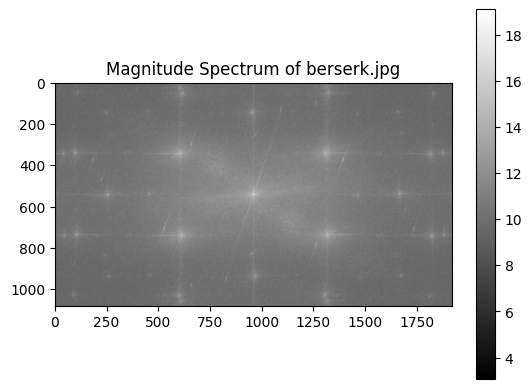

In [33]:
# Display the magnitude of the spectrum
plt.figure()
plt.imshow(np.log(np.abs(fft_image) + 1), cmap='gray')
plt.title(f'Magnitude Spectrum of {file_name}')
plt.colorbar()
plt.show()


# 2. Resizing an Image to Half Size

We are considering two ways to resize an image to half its size: 

- $\textbf{Subsampling in the spatial domain}$

- $\textbf{Resizing in the Fourier domain}$

## $\underline{\text{Method A}}$: Subsampling in the Spatial Domain

- This method is very straightforward and can be thought of as $\textcolor{red}{\text{"skipping pixels"}}$.

- Subsampling means taking every other pixel in both the horizontal and vertical directions.

- We can imagine it as having a grid of pixels in the image, and throwing away every second pixel, effectively halving the size of the image. The image size is reduced, but since we are discarding a lot of information (high-frequency details), the result can look blocky or blurry, especially if the image has fine details.

- Due the high quality of the original image, when subsampling by 2, the image still conserves good quality, although when subsampling with a higher value such as 10 (10 pixels are skipped), then we can recognize the blocky/blurry look.


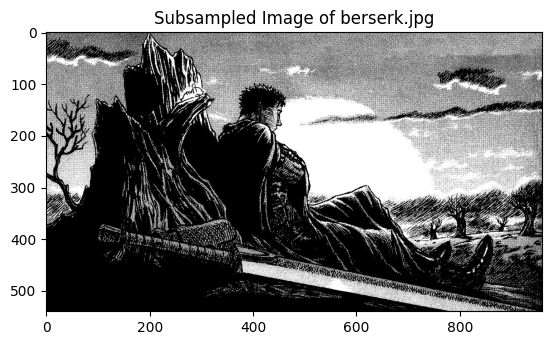

In [34]:
# Subsample the image (take every 2nd pixel in both directions)
half_image_subsampled = image_data[::2, ::2]

# Display the subsampled image
plt.figure()
plt.imshow(half_image_subsampled, cmap='gray')
plt.title(f'Subsampled Image of {file_name}')
plt.show()

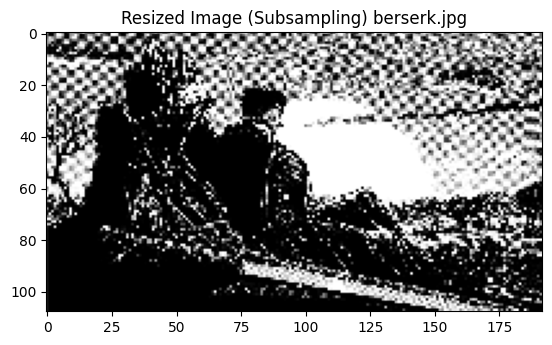

In [35]:
# Subsample the image (take every 2nd pixel in both directions)
half_image_subsampled = image_data[::10, ::10]

# Display the subsampled image
plt.figure()
plt.imshow(half_image_subsampled, cmap='gray')
plt.title(f'Resized Image (Subsampling) {file_name}')
plt.show()

## $\underline{\text{Method B}}$: Resizing Fourier Domain

This method is a bit more sophisticated than simple subsampling, although still quite straightforward.

- Fourier Domain is where we work with the frequency representation of the image (after applying FFT), and the method can be thought as $\textcolor{red}{\text{"cropping selected pixels"}}$.

- When we resize in this domain, we can be more selective about what information to keep. For example, if we want to reduce the size of the image, we can remove/crop high-frequency components and keep only the low frequencies. Low frequencies represent general shapes and smooth areas, so the result will keep the general structure but lose some fine details.

- Since we remove the high frequencies (details), the image will become smoother, but it avoids the harsh blurriness that occurs in simple subsampling.
Steps:
Apply FFT to the image.
Remove high-frequency components by cropping the center part of the Fourier-transformed image (which contains the low frequencies).
Apply the inverse FFT to go back to the spatial domain.

In the upcoming code cell, we define the function that I will explain right now with an example. Let's consider that our image has dimensions of 1080 × 1920 pixels.

- $\fbox{Step 1}$ : We determine the shape of the (2D FFT) image to localize the center.

$\textcolor{green}{\text{rows, cols = fft\_image.shape}}$ (where rows = 1080 and cols = 1920)

The center of the image would be:
$\textcolor{green}{\text{crow, ccol = rows // 2, cols // 2}}$  (where crow = 540 and ccol = 960)

These values help us locate the center of the FFT image because, after shifting the frequencies using fftshift, the low-frequency components (which we want to keep) are located near the center, and the high-frequency components that we want to crop, are far (at the corners) from the center of the image.

- $\fbox{Step 2}$ : Crop the FFT Image to Retain Low Frequencies

To crop the FFT image around its center (crow, ccol), we need to define a certain amount/portion that we want to keep, which we will call "factor". 

For instance, if the $\textcolor{green}{\text{factor}}$ is 0.5, we are keeping the central 50% of the frequency components (low frequencies) and discarding the external 50% (high frequencies).

- For the rows:
    - Start: crow - int(crow * factor) = 540 - int(540 * 0.5) = 540 - 270 = 270
    - End: crow + int(crow * factor) = 540 + int(540 * 0.5) = 540 + 270 = 810

So, we're keeping rows from 270 to 810, a total of 540 rows (half the original 1080 rows).

- For the columns:
    - Start: ccol - int(ccol * factor) = 960 - int(960 * 0.5) = 960 - 480 = 480
    - End: ccol + int(ccol * factor) = 960 + int(960 * 0.5) = 960 + 480 = 1440

So, we're keeping columns from 480 to 1440, a total of 960 columns (half the original 1920 columns).

So, the result of the cropping is an FFT image with dimensions 540 × 960, which represents a smaller version of the original image, retaining only the low-frequency information.

Those computations will easily be done by:

$\textcolor{green}{\text{new\_fft = fft\_image[
    crow - int(crow * factor):crow + int(crow * factor),
    ccol - int(ccol * factor):ccol + int(ccol * factor)
]}}$


In [36]:
def resize_fft(fft_image, factor=0.5):
    # Get the shape of the FFT image
    rows, cols = fft_image.shape
    crow, ccol = rows // 2 , cols // 2  # Center

    # Crop the FFT image to retain low frequencies
    new_fft = fft_image[crow-int(crow*factor):crow+int(crow*factor), ccol-int(ccol*factor):ccol+int(ccol*factor)]
    return new_fft

# Crop the FFT image to half the size
fft_cropped = resize_fft(fft_image, factor=0.5)

Now, we just need to get the resized image by proceeding inversely as we began. To do so, we will use predefined functions such as:

- $\textcolor{green}{\text{fft\_cropped}}$ is the cropped FFT data after applying the resize_ftt function.

- $\textcolor{green}{\text{ifftshift}}$ is applied to move the low-frequency components (which we centered earlier) back to their original positions.

- $\textcolor{green}{\text{ifft2}}$ is the inverse FFT, which transforms the cropped frequency domain image back into the spatial domain (i.e., it gives us the actual resized image).

- $\textcolor{green}{\text{np.abs}}$ takes the magnitude of the inverse FFT, which gives the pixel intensities of the resized image by converting the complex/imaginary values to real ones.

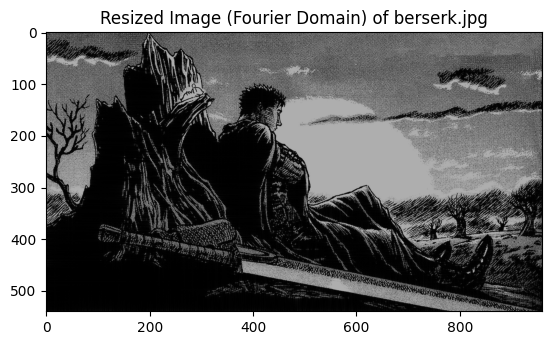

Shape of Resized Image: (540, 960)


In [37]:
# Inverse FFT to get the resized image
resized_image_fft = np.abs(np.fft.ifft2(np.fft.ifftshift(fft_cropped)))

# Display the resized image
plt.figure()
plt.imshow(resized_image_fft, cmap='gray')
plt.title(f'Resized Image (Fourier Domain) of {file_name}')
plt.show()

print(f"Shape of Resized Image: {resized_image_fft.shape}")

# 3. Resizing an Image to Double Size

Now, let's talk about doing the opposite process, making an image larger. There are two common ways to do this: 

- $\textbf{Sinc interpolation in the Fourier domain}$

- $\textbf{Linear interpolation in the spatial domain}$

## $\underline{\text{Method A}}$: Sinc Interpolation in the Fourier Domain

- Sinc interpolation is a method of smoothly increasing the size of an image by adding new data points (pixels) in a way that preserves the image’s smoothness.

- In the Fourier domain, we can achieve this by zero-padding the frequency representation of the image.
Zero-padding means adding zeros to the frequency spectrum, effectively increasing the resolution of the image’s frequency components.

- After zero-padding, the inverse FFT is applied to get a larger image with a smooth interpolation of details.

How does this affect the image?

This method tends to produce smooth results without introducing much distortion or artifacts because it is based on the frequency components of the image. It’s one of the most accurate ways to resize an image, especially for images with fine details.


Original Shape: (1080, 1920)
Expected Shape: (2160, 3840)
Original Image Center: (540, 960)
540 : 1620 | 960 : 2880
0j


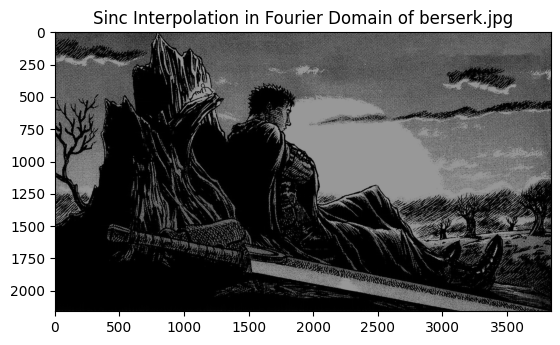

In [38]:
def zero_pad_fft(fft_image, new_shape):
    # Get the current size
    old_rows, old_cols = fft_image.shape
    new_rows, new_cols = new_shape
    print("Original Shape:", fft_image.shape)
    
    # Initialize new array with zeros (the new size)
    padded_fft = np.zeros((new_rows, new_cols), dtype=fft_image.dtype)
    print("Expected Shape:", padded_fft.shape)

    # Get the center of the original FFT
    crow, ccol = old_rows // 2 , old_cols // 2
    print(f"Original Image Center: ({crow}, {ccol})")

    # Place the original FFT in the center of the new array
    print(new_rows//2 - crow, ":", new_rows//2 + crow, "|", new_cols//2 - ccol,":", new_cols//2 + ccol)
    padded_fft[new_rows//2 - crow:new_rows//2 + crow, new_cols//2 - ccol:new_cols//2 + ccol] = fft_image

    print(padded_fft[539, 959])

    return padded_fft

# Zero pad the FFT image to double the size
padded_fft_image = zero_pad_fft(fft_image, (image_data.shape[0] * 2, image_data.shape[1] * 2))

# Inverse FFT to get the upscaled image
upsampled_image_fft = np.abs(np.fft.ifft2(np.fft.ifftshift(padded_fft_image)))

# Display the upscaled image
plt.figure()
plt.imshow(upsampled_image_fft, cmap='gray')
plt.title(f'Sinc Interpolation in Fourier Domain of {file_name}')
plt.show()


### Comentary

- When we zero-pad the Fourier-transformed image, we're not adding high-frequency components. Instead, we're increasing the size of the frequency grid. This means we allowing for more detailed sampling when converting back to the spatial domain.

- The zeros are added around the edges of the frequency domain, representing areas with no additional frequency content. When performing the inverse FFT, this zero-padding leads to smoother transitions and higher spatial resolution. The resulting image gets larger but remains smooth because no new high frequencies are introduced.

## $\underline{\text{Method B}}$: Linear Interpolation in the Spatial Domain

- Linear interpolation is a much simpler method, and it's commonly used in image processing. 

- In this method, when you increase the size of the image, the algorithm estimates the values of new pixels by interpolating between the values of nearby pixels.

- For example, if you’re resizing a 100x100 image to 200x200, the new pixels are calculated as a weighted average of the original pixels.

How does this affect the image?

Linear interpolation is fast and easy to implement, but it can sometimes produce jagged edges or blocky artifacts, especially in images with sharp edges or fine textures.

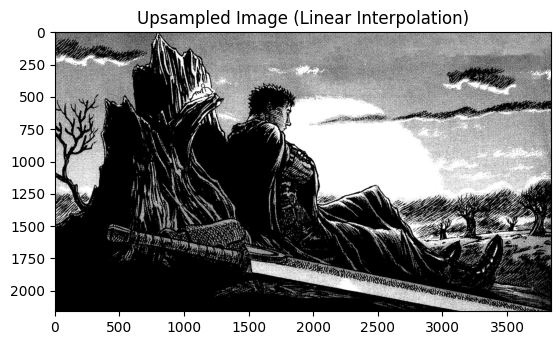

In [41]:
# Resize the image using linear interpolation (PIL)
upscaled_image_linear = image.resize((image.width * 2, image.height * 2), Image.Resampling.BILINEAR)

# Display the resized image
plt.figure()
plt.imshow(upscaled_image_linear, cmap='gray')
plt.title('Upsampled Image (Linear Interpolation)')
plt.show()